In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [21]:
# Study data files
mouse_metadata_path = "/Users/muskanmittal/Desktop/homework/matplotlib-challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/muskanmittal/Desktop/homework/matplotlib-challenge/Pymaceuticals/data/Study_results.csv"

In [34]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [66]:
# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [67]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice


249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [69]:
# Identifying the duplicate mouse IDs
duplicate_mouse_ids = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Getting all the data for the duplicate mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:

# Creating a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = cleaned_data['Mouse ID'].nunique()

number_of_mice_clean


248

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data by 'Drug Regimen'
drug_group = combined_data.groupby('Drug Regimen')

# Calculate the summary statistics for 'Tumor Volume (mm3)'
summary_mean = drug_group['Tumor Volume (mm3)'].mean()
summary_median = drug_group['Tumor Volume (mm3)'].median()
summary_variance = drug_group['Tumor Volume (mm3)'].var()
summary_std_dev = drug_group['Tumor Volume (mm3)'].std()
summary_sem = drug_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': summary_mean,
    'Median Tumor Volume': summary_median,
    'Tumor Volume Variance': summary_variance,
    'Tumor Volume Std. Dev.': summary_std_dev,
    'Tumor Volume SEM': summary_sem
})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# Using the aggregation method to produce summary statistics in a single line
summary_statistics = combined_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_statistics

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)



summary_stats_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


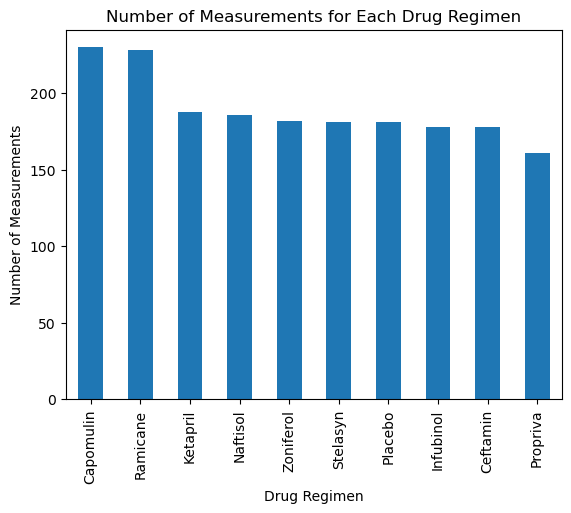

In [74]:
# Count the total number of measurements for each drug regimen
measurement_counts = combined_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
bar_plot = measurement_counts.plot(kind='bar', title='Number of Measurements for Each Drug Regimen')

# Set the labels for the x and y axis
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Number of Measurements')

# Display the plot
plt.show()


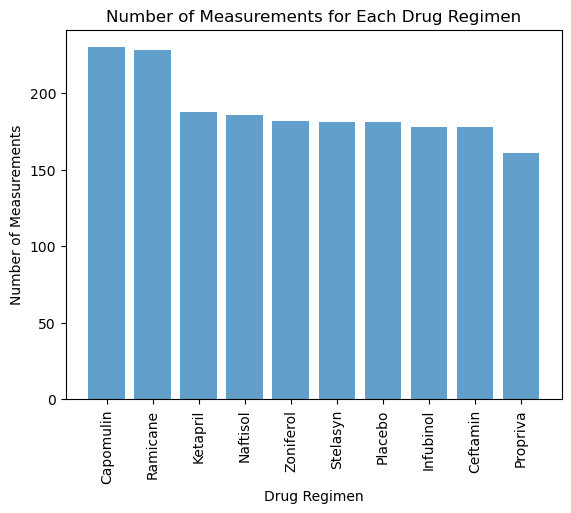

In [75]:
import matplotlib.pyplot as plt

# Count the total number of measurements for each drug regimen
measurement_counts = combined_data['Drug Regimen'].value_counts()

# Set the x-axis to the name of the drug regimens
x_axis = measurement_counts.index.values
# Set the y-axis to the count of measurements for each drug regimen
y_axis = measurement_counts.values

# Generate a bar plot using Pyplot
plt.bar(x_axis, y_axis, align='center', alpha=0.7)

# Set a title for the chart
plt.title('Number of Measurements for Each Drug Regimen')
# Label the x and y axes
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

# Rotate the names on x-axis so they are legible
plt.xticks(rotation=90)

# Display the plot
plt.show()


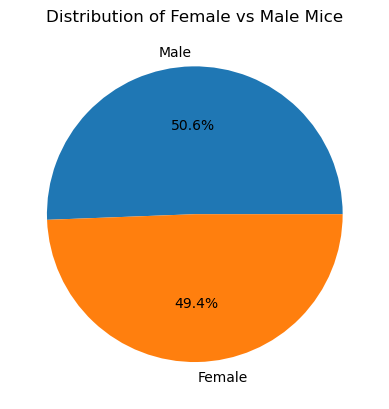

In [165]:
# Count the number of female versus male mice
sex_distribution = combined_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = sex_distribution.plot.pie(autopct='%1.1f%%', startangle=0, title='Distribution of Female vs Male Mice')


# Hide the y-label 'Sex' as it is unnecessary for a pie chart
pie_plot.set_ylabel('')

# Display the plot
plt.show()


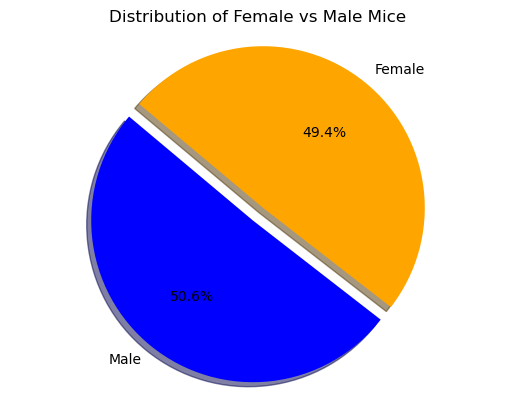

In [139]:
import matplotlib.pyplot as plt

# Calculate the distribution of mice by sex
sex_distribution = combined_data['Sex'].value_counts()

# Define labels for the sections of our pie chart
labels = sex_distribution.index

# The values of each section of the pie chart
sizes = sex_distribution.values

# The colors of each section of the pie chart
colors = ['blue', 'orange']

# Determine which section of the circle to detach
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Female')

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Set a title for the chart
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()


In [140]:
# Filtering the combined data for the four specific drug regimens
filtered_data = combined_data[combined_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')




In [149]:
# List of treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_list = []

# Loop through each drug regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Add subset to tumor volume list
    tumor_vol_list.append(final_volume_subset)

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_volume_subset.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume_subset[(final_volume_subset < lower_bound) | (final_volume_subset > upper_bound)]

    # Display the results
    print(f"{treatment}'s Potential outliers: {outliers}")


Capomulin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


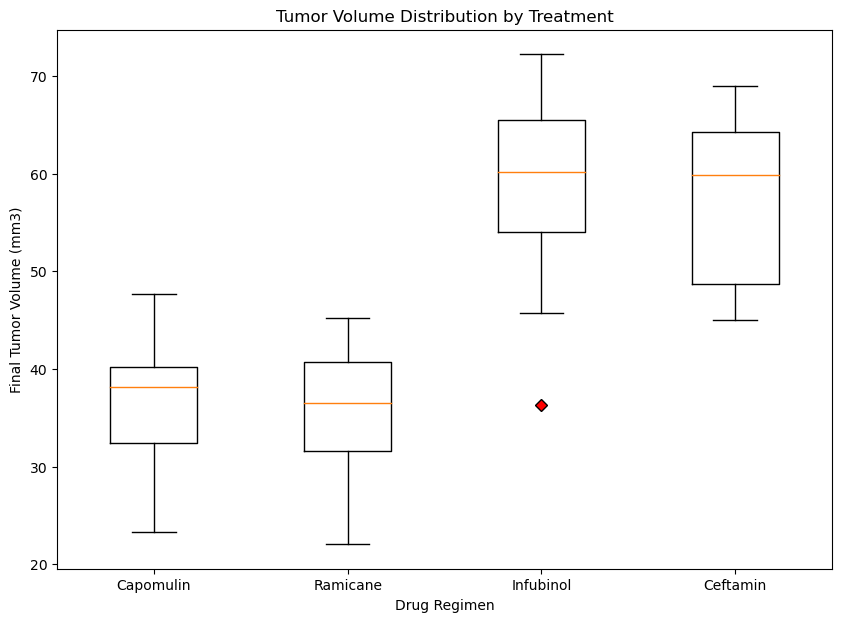

In [150]:
import matplotlib.pyplot as plt

# Treatments list for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a box plot that shows the distribution of the tumor volume for each treatment group
plt.figure(figsize=(10, 7))
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))

# Add title and labels to the box plot
plt.title('Tumor Volume Distribution by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the plot
plt.show()


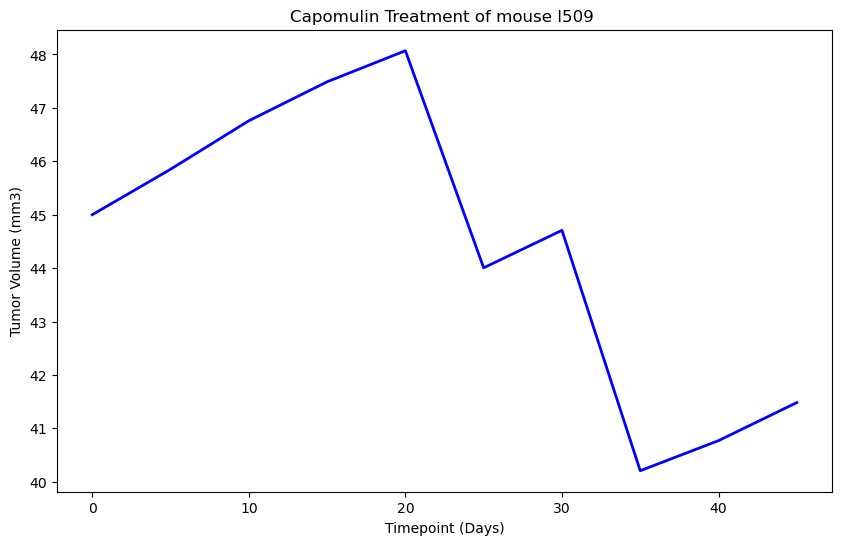

In [161]:
import matplotlib.pyplot as plt

# Select a mouse treated with Capomulin
mouse_id = 'l509'

# Extract data for this specific mouse
mouse_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id)]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'],  color='b', linestyle='-', linewidth=2)

# Adding title and labels
plt.title(f"Capomulin Treatment of mouse {mouse_id} ")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()


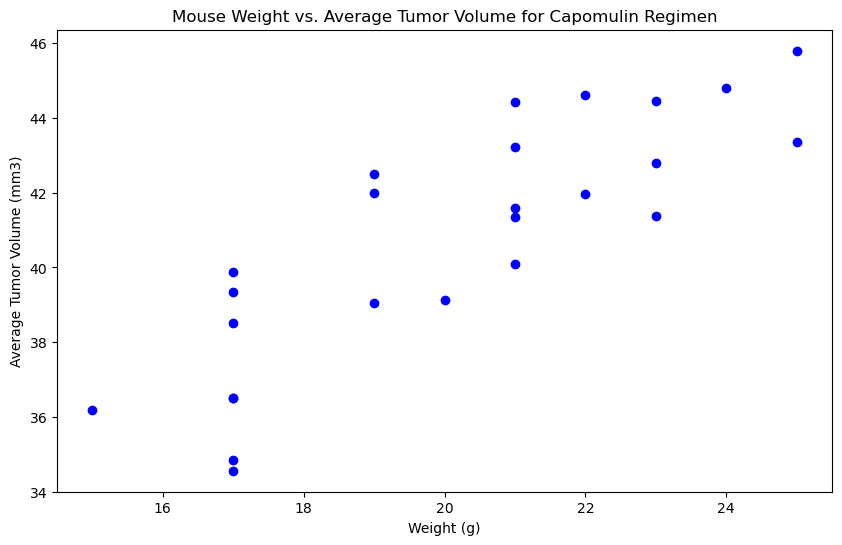

In [162]:
import matplotlib.pyplot as plt

# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'))

# Merge this data with the mouse weight data
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average_Tumor_Volume'], color='blue')

# Adding title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()


The correlation between mouse weight and average tumor volume on the Capomulin regimen is 0.841936342469472


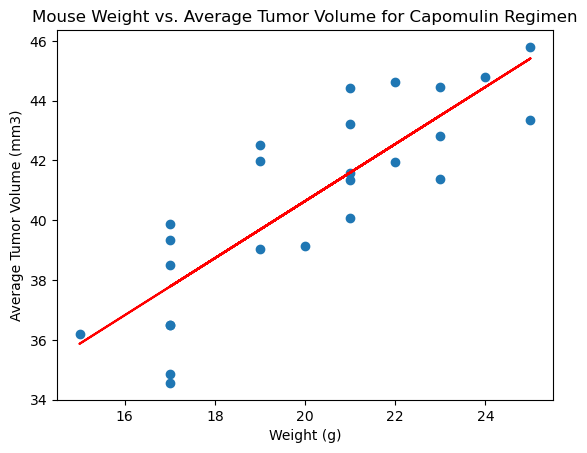

In [163]:
import matplotlib.pyplot as plt
import scipy.stats as st

# Assuming merged_data contains the necessary Capomulin data (as prepared in the previous scatter plot task)

# Calculate the Pearson correlation coefficient
correlation = st.pearsonr(merged_data['Weight (g)'], merged_data['Average_Tumor_Volume'])

# Print the correlation
print(f"The correlation between mouse weight and average tumor volume on the Capomulin regimen is {correlation[0]}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Weight (g)'], merged_data['Average_Tumor_Volume'])

# Create equation of the line to calculate predicted tumor volume
regress_values = merged_data['Weight (g)'] * slope + intercept

# Plot the linear model on top of the scatter plot 
plt.scatter(merged_data['Weight (g)'], merged_data['Average_Tumor_Volume'])
plt.plot(merged_data['Weight (g)'], regress_values, "r-")



# Adding title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()
